<a href="https://colab.research.google.com/github/yhussain1/MachineLearning/blob/main/Animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import files
#upload_file = files.upload()
!unzip drive/MyDrive/animals.zip

In [14]:
# Locate and convert image dataset to tf.data.Datset
# Labels inferred will classify the imgaes based on folder location
animals = tf.keras.preprocessing.image_dataset_from_directory('animals/', labels='inferred')
animals_path = 'animals/'

Found 26179 files belonging to 10 classes.


In [15]:
# No. samples per batch
# image height and width in pixels
batch_size = 32
img_height = 180
img_width = 180

In [16]:
# splitting into the train and validation dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    'animals/',
    validation_split=0.2,
    subset='training',
    shuffle = True,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    'animals/',
    validation_split=0.2,
    subset='validation',
    shuffle = True,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


In [18]:
# names of animal classes identified with keras
class_names = train_ds.class_names
print(class_names)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


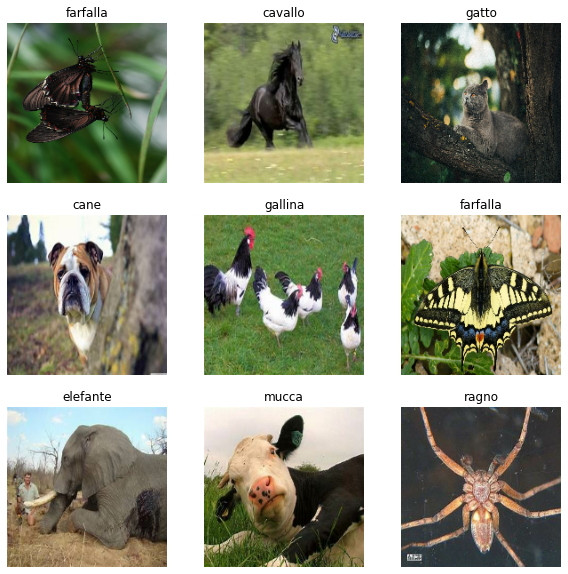

In [19]:
# plot some images with their class
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [20]:
# see batch size, img height width, rgb
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Exploratory Data analysis

In [21]:
import os
import glob

# use os to identify [1] cavallo class
# glob all pathnames in animal_path matching pattern '*'
animal_path = os.path.join(animals_path, class_names[1], '*')
animal_path = glob.glob(animal_path)

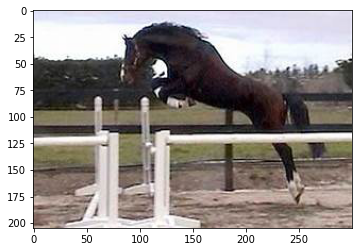

In [22]:
import skimage
from skimage import io 

# view an image from the animal_path onto a grid
image = io.imread(animal_path[4])
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

Text(0.5, 0.98, 'Original & RGB image channels')

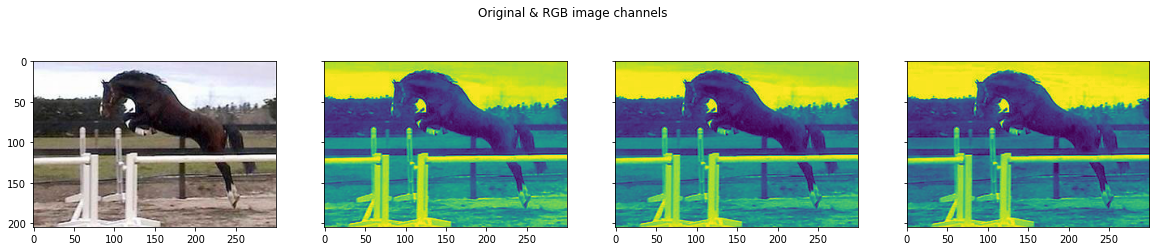

In [23]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

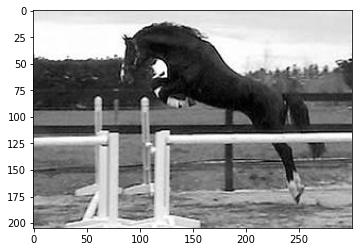

In [24]:
# grayscale on images can reduce computation complexity
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

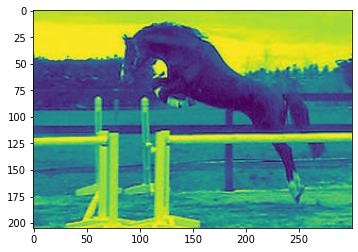

In [25]:
# normalise data so all images contribute equally to the total loss
# provide a standard learning rate for all images
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

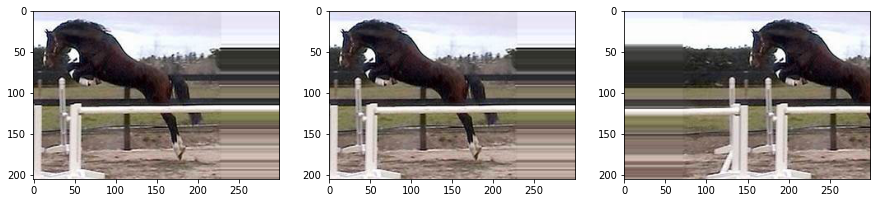

In [26]:
from numpy import expand_dims
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator

# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-70,70])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# use shifting to shift the pixels horizontally or vertically

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

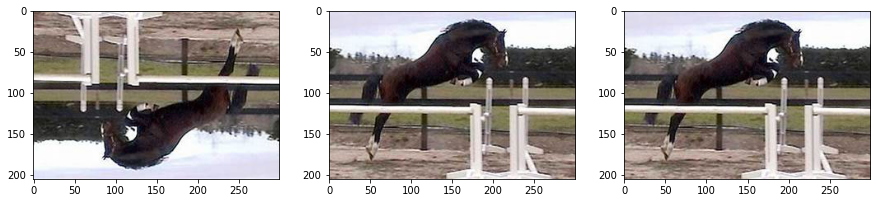

In [27]:
# flipping to reverse rows or columns of pixels in either vertical or horizontal cases
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

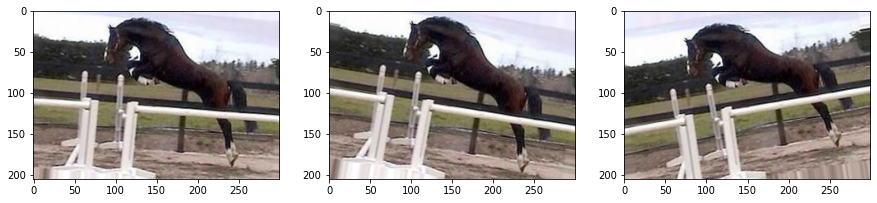

In [28]:
#rotate image by certain degree
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

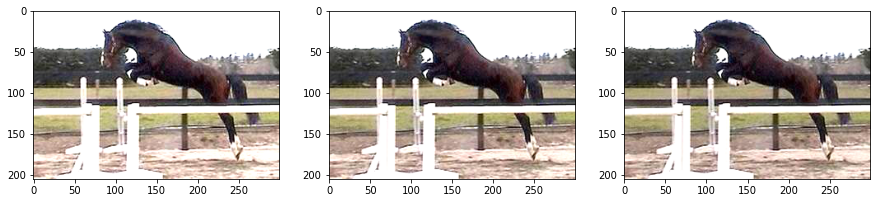

In [29]:
# change brightness of image
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

In [30]:
num_classes = len(class_names)


model = Sequential([
    # preprocess to rescale input from [0, 255] to [0,1] and input shape fits the defined height and width
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # convulutional layer learns 16, 32, 64 filters
    # max pooling followed to reduce spatial dimensions of the output volume
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(), # flatten input
    layers.Dense(128, activation='relu'), # regular deep nn layer of 128 outputs
    layers.Dense(num_classes) # output based on number of classes
])

In [31]:
# compile model, keras losses will compute the losses between the labels and predictions, logits for if prediction is a logits tensor
# metrics for how to score the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [33]:
# run model on dataset
# 1 epoch 10mins

# epochs = 10
# history = model.fit(train_ds, validation_data = val_ds, epochs=epochs)

Epoch 1/10
655/655 [==============================] - 45s 56ms/step - loss: 1.6670 - accuracy: 0.4209 - val_loss: 1.3001 - val_accuracy: 0.5547
Epoch 2/10
655/655 [==============================] - 36s 54ms/step - loss: 1.1775 - accuracy: 0.6029 - val_loss: 1.1787 - val_accuracy: 0.5935
Epoch 3/10
655/655 [==============================] - 35s 53ms/step - loss: 0.8744 - accuracy: 0.7053 - val_loss: 1.1253 - val_accuracy: 0.6290
Epoch 4/10
655/655 [==============================] - 36s 54ms/step - loss: 0.5965 - accuracy: 0.7996 - val_loss: 1.2608 - val_accuracy: 0.6216
Epoch 5/10
655/655 [==============================] - 35s 53ms/step - loss: 0.3611 - accuracy: 0.8779 - val_loss: 1.5731 - val_accuracy: 0.6269
Epoch 6/10
655/655 [==============================] - 35s 53ms/step - loss: 0.2066 - accuracy: 0.9335 - val_loss: 1.9066 - val_accuracy: 0.6130
Epoch 7/10
655/655 [==============================] - 35s 53ms/step - loss: 0.1365 - accuracy: 0.9549 - val_loss: 2.1446 - val_accuracy:

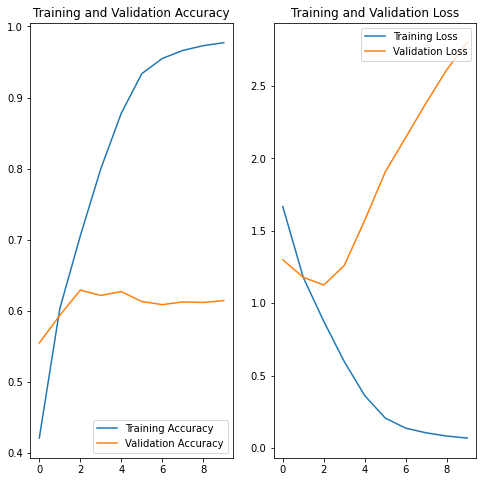

In [34]:
# plot training and validation, loss and accuracy

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [35]:
# train and validation accuracy are off by large margins so performance needs to be increased
# sign of overfitting
# Use data augmentation to generate additional data from existing examples by augmenting image that still create believable-loooking images

data_augmentation = keras.Sequential(
  [layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),])

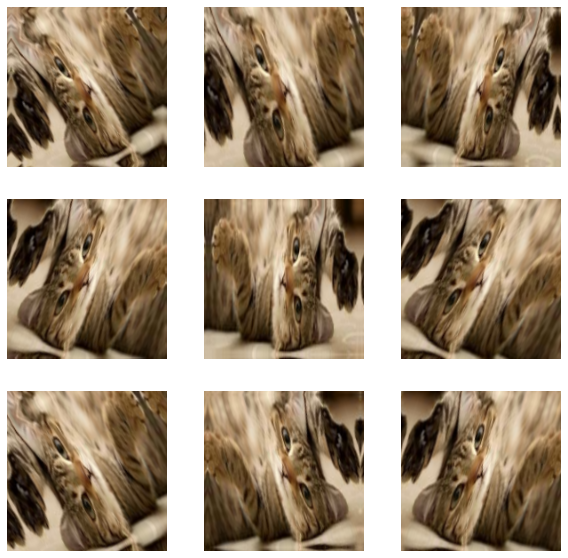

In [36]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [37]:
# new model with data augmentation and dropout

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # dropout randomly drops output units 20% from the applied layer
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [40]:
epochs = 10
history = model.fit(train_ds, validation_data = val_ds, epochs=epochs)

Epoch 1/10
655/655 [==============================] - 51s 76ms/step - loss: 1.7267 - accuracy: 0.3993 - val_loss: 1.4395 - val_accuracy: 0.5098
Epoch 2/10
655/655 [==============================] - 50s 76ms/step - loss: 1.3558 - accuracy: 0.5421 - val_loss: 1.1925 - val_accuracy: 0.5962
Epoch 3/10
655/655 [==============================] - 49s 75ms/step - loss: 1.2036 - accuracy: 0.5934 - val_loss: 1.3419 - val_accuracy: 0.5433
Epoch 4/10
655/655 [==============================] - 50s 76ms/step - loss: 1.1156 - accuracy: 0.6222 - val_loss: 1.0697 - val_accuracy: 0.6407
Epoch 5/10
655/655 [==============================] - 51s 78ms/step - loss: 1.0477 - accuracy: 0.6471 - val_loss: 1.0762 - val_accuracy: 0.6416
Epoch 6/10
655/655 [==============================] - 50s 76ms/step - loss: 0.9930 - accuracy: 0.6601 - val_loss: 1.0489 - val_accuracy: 0.6543
Epoch 7/10
655/655 [==============================] - 50s 77ms/step - loss: 0.9595 - accuracy: 0.6759 - val_loss: 1.0820 - val_accuracy:

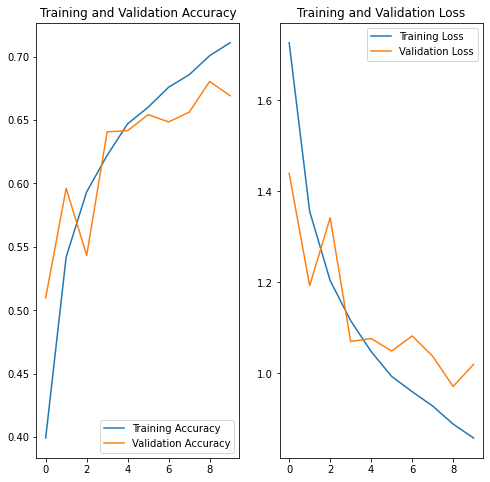

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
gallina_path = 'test/elefante.jpg'
img = tf.keras.utils.load_img(
    gallina_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 181ms/step
This image most likely belongs to elefante with a 47.21 percent confidence.


In [43]:

def predictor(path):
  img = tf.keras.utils.load_img(path, target_size=(img_height, img_width))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  
  #print('''Predicted:{} \nwith {:.2f}% Confidence.'''.
   #     format(class_names[np.argmax(score)].upper(), 100 * np.max(score)))

  title = 'Predicted: '+str(class_names[np.argmax(score)].upper())+ '\nConfidence: ' +str(round(100 * np.max(score),2))
  plt.figure(figsize=(7, 5)).suptitle(title, fontsize=12)
  plt.imshow(load_img(path))

* cane = dog
* cavallo = horse
* elefante = elephant
* farfalla = butterfly
* gallina = hen
* gatto = cat
* mucca = cow
* pecora = sheep
* ragno = spider
* scoiattolo = squirrel

In [ ]:
testimg = ['test/tiger.jpg', 'test/hippo.jpg', 'test/spiders.jpeg', 
           'test/squirrel.jpeg', 'test/sheep.jpg']

for i in testimg:
  predictor(i)

In [ ]:
humanimg = ['test/beatrice.png', 'test/cal.png', 'test/dan.png', 
           'test/me.png', 'test/una.png']

for i in humanimg:
  predictor(i)

In [46]:
#https://www.section.io/engineering-education/image-preprocessing-in-python/
#https://www.tensorflow.org/tutorials/images/classification


In [47]:
import sklearn.metrics as metrics

test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    animals_path, # Put your path here
    target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)

test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)
predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = class_names
class_labels = list(test_data_generator.class_indices.keys()) 

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

Found 26179 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


ValueError: ignored